# Organize Data
get data looking the way we need without manually changing the file

In [32]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import seaborn library for plots
import seaborn as sns
%matplotlib inline

In [2]:
#read in data and verify
names = ['Rank','Name', 'Platform', 'Year', 'Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
df = pd.read_csv('vgsales2.csv', header=None,delim_whitespace=False,names=names,na_values='?')
df.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [3]:
df.shape

(16598, 11)

In [5]:
#drop all rows with empty slots
df = df.dropna()

In [6]:
df.shape

(16291, 11)

In [7]:
df.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [49]:
#drop all rows past 2015
df = df[df.Year < 2016]
df.shape

(15945, 11)

In [50]:
df.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [52]:
#display the values of the Publishers so that we can get a top 10
df.Publisher.value_counts()

Electronic Arts                           1319
Activision                                 952
Ubisoft                                    904
Namco Bandai Games                         888
Konami Digital Entertainment               815
THQ                                        712
Nintendo                                   686
Sony Computer Entertainment                677
Sega                                       622
Take-Two Interactive                       400
Capcom                                     358
Atari                                      346
Tecmo Koei                                 321
Disney Interactive Studios                 214
Square Enix                                211
Warner Bros. Interactive Entertainment     203
Midway Games                               196
Eidos Interactive                          196
505 Games                                  185
Microsoft Game Studios                     185
Acclaim Entertainment                      184
D3Publisher  

In [59]:
#drop all rows that aren't in the top 10
dfP1 = df[df.Publisher == 'Electronic Arts']
dfP2 = df[df.Publisher == 'Activision']
dfP3 = df[df.Publisher == 'Ubisoft']
dfP4 = df[df.Publisher == 'Namco Bandai Games']
dfP5 = df[df.Publisher == 'Konami Digital Entertainment']
dfP6 = df[df.Publisher == 'THQ']
dfP7 = df[df.Publisher == 'Nintendo']
dfP8 = df[df.Publisher == 'Sony Computer Entertainment']
dfP9 = df[df.Publisher == 'Sega']
dfP10 = df[df.Publisher == 'Take-Two Interactive']
df = pd.concat([dfP1,dfP2,dfP3,dfP4,dfP5,dfP6,dfP7,dfP8,dfP9,dfP10])
df = df.sort_values('Rank',ascending=True)
df.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [60]:
df.shape

(7975, 11)

# Seperate data by platform
## Platforms: PS (PS,PS2,PS3), XB (XB & XB360), PC

In [61]:
dfXB = df[df.Platform == 'XB']

In [62]:
dfXB.shape

(388, 11)

In [63]:
dfXB.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
464,465,Tom Clancy's Splinter Cell,XB,2002.0,Action,Ubisoft,1.85,1.04,0.00,0.13,3.02
507,508,The Elder Scrolls III: Morrowind,XB,2002.0,Role-Playing,Ubisoft,2.09,0.63,0.03,0.11,2.86
617,618,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,Action,Take-Two Interactive,1.84,0.56,0.00,0.09,2.49
696,698,Need for Speed Underground 2,XB,2004.0,Racing,Electronic Arts,1.38,0.80,0.00,0.10,2.28
742,744,Star Wars: Knights of the Old Republic,XB,2003.0,Role-Playing,Activision,1.68,0.44,0.00,0.08,2.19
873,875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,1.95


In [64]:
dfX360 = df[df.Platform == 'X360']
dfX360.shape

(661, 11)

In [65]:
dfX360.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
36,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02


In [66]:
dfPC = df[df.Platform == 'PC']
dfPC.shape

(393, 11)

In [67]:
dfPC.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.0,0.71,8.11
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.0,0.00,6.28
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.0,0.62,5.20
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.0,0.59,4.83
267,268,Warcraft II: Tides of Darkness,PC,1995.0,Strategy,Activision,1.70,2.27,0.0,0.23,4.21
288,289,World of Warcraft: The Burning Crusade,PC,2007.0,Role-Playing,Activision,2.57,1.52,0.0,0.00,4.09


In [68]:
dfPS = df[df.Platform == 'PS']
dfPS.shape

(523, 11)

In [69]:
dfPS.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
52,53,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
66,67,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
69,70,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
105,106,Tekken 3,PS,1998.0,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16
106,107,Crash Bandicoot 3: Warped,PS,1998.0,Platform,Sony Computer Entertainment,3.68,1.75,1.42,0.28,7.13


In [70]:
dfPS2 = df[df.Platform == 'PS2']
dfPS2.shape

(1083, 11)

In [71]:
dfPS2.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
86,87,Final Fantasy X,PS2,2001.0,Role-Playing,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05


In [72]:
dfPS3 = df[df.Platform == 'PS3']
dfPS3.shape

(768, 11)

In [73]:
dfPS3.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
54,55,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
55,56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.69,0.38,1.63,10.69


### Group needed platforms and re-order

In [172]:
#Group platforms and reorder
df2 = pd.concat([dfXB,dfX360,dfPC,dfPS,dfPS2,dfPS3])
df2.shape

(3816, 11)

In [76]:
df2 = df2.sort_values('Rank',ascending=True)
df2.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76


# Display Information
### platform vs sales, genre vs sales, publisher vs sales

#### Overall sales

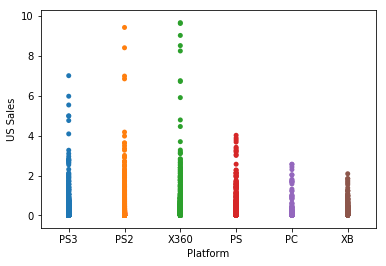

In [160]:
sns.stripplot(x=df2['Platform'], y=df2['NA_Sales'])
plt.xlabel('Platform')
plt.ylabel('US Sales')

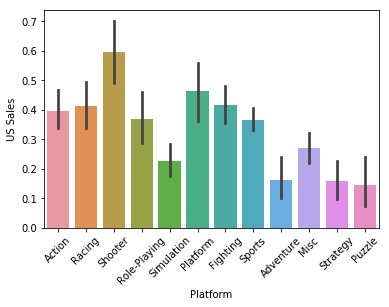

In [86]:
sns.barplot(x=genre, y=US)
plt.xticks(rotation=45)
plt.xlabel('Platform')
plt.ylabel('US Sales')

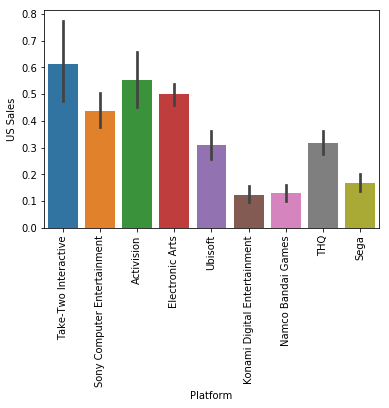

In [88]:
sns.barplot(x=publisher, y=US)
plt.xticks(rotation=90)
plt.xlabel('Platform')
plt.ylabel('US Sales')

In [166]:
#Label Encoding
from sklearn import linear_model, preprocessing
le = preprocessing.LabelEncoder()
df3 = df2.apply(le.fit_transform)
df3.head(6)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,0,745,3,21,0,7,275,225,83,124,410
17,1,748,2,12,0,7,280,40,41,126,409
23,2,745,4,21,0,7,281,219,6,105,408
24,3,749,2,10,0,7,277,220,47,114,407
28,4,734,2,9,6,5,273,218,102,99,406
29,5,286,4,19,8,0,279,211,13,104,405


In [158]:
platform = np.array(df3['Platform'])
genre = np.array(df3['Genre'])
publisher = np.array(df3['Publisher'])
US = np.array(df3['NA_Sales'])
EU = np.array(df3['EU_Sales'])
JP = np.array(df3['JP_Sales'])
Global = np.array(df3['Global_Sales'])
X = np.vstack((platform, genre,publisher))
X = X.T

# Single Variable Linear Model

## Linear Regression

In [162]:
nsamp, natt = X.shape

### Simple Linear Regression per feature

In [164]:
y = US
ym = np.mean(y)
syy = np.mean((y-ym)**2)
Rsq = np.zeros(natt)
beta0 = np.zeros(natt)
beta1 = np.zeros(natt)
for k in range(natt):
    xm = np.mean(X[:,k])
    sxy = np.mean((X[:,k]-xm)*(y-ym))
    sxx = np.mean((X[:,k]-xm)**2)
    beta1[k] = sxy/sxx
    beta0[k] = ym - beta1[k]*xm
    Rsq[k] = (sxy)**2/sxx/syy
    
    print("{0:2d}  Rsq={1:f}".format(k,Rsq[k]))

 0  Rsq=0.009122
 1  Rsq=0.000147
 2  Rsq=0.002413


### Multiple Variable Linear Model

In [167]:
ns_train = nsamp // 2
ns_test = nsamp - ns_train
X_tr = X[:ns_train,:]
y_tr = y[:ns_train]
regr = linear_model.LinearRegression()
regr.fit(X_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [169]:
y_tr_pred = regr.predict(X_tr)
RSS_tr = np.mean((y_tr_pred-y_tr)**2)/(np.std(y_tr)**2)
Rsq_tr = 1-RSS_tr
print("RSS per sample = {0:f}".format(RSS_tr))
print("R^2 =            {0:f}".format(Rsq_tr))

RSS per sample = 0.993763
R^2 =            0.006237


In [170]:
X_test = X[ns_train:,:]
y_test = y[ns_train:]
y_test_pred = regr.predict(X_test)
RSS_test = np.mean((y_test_pred-y_test)**2)/(np.std(y_test)**2)
Rsq_test = 1-RSS_test
print("RSS per sample = {0:f}".format(RSS_test))
print("R^2 =            {0:f}".format(Rsq_test))

RSS per sample = 73.648555
R^2 =            -72.648555


## Neural Network

In [173]:
import keras
from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [174]:
import keras.backend as K
K.clear_session()

In [176]:
nin = 3 #number of inputs
nh = 4 #number of hidden layers
nout = 1 #number of outputs
model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 4)                 16        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [177]:
#train the network
opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [178]:
nit = 20   # number of training iterations
nepoch_per_it = 50  # number of epochs per iterations

# Loss, accuracy and epoch per iteration
loss = np.zeros(nit)
acc = np.zeros(nit)
epoch_it = np.zeros(nit)

# Main iteration loop
for it in range(nit):
    
    # Continue the fit of the model
    init_epoch = it*nepoch_per_it
    model.fit(X, y, epochs=nepoch_per_it, batch_size=100, verbose=0)
    
    # Measure the loss and accuracy on the training data
    lossi, acci = model.evaluate(X,y, verbose=0)
    epochi = (it+1)*nepoch_per_it
    epoch_it[it] = epochi
    loss[it] = lossi
    acc[it] = acci
    print("epoch=%4d loss=%12.4e acc=%7.5f" % (epochi,lossi,acci))

epoch=  50 loss= -5.3159e+02 acc=0.02804
epoch= 100 loss= -5.3159e+02 acc=0.02804
epoch= 150 loss= -5.3159e+02 acc=0.02804
epoch= 200 loss= -5.3159e+02 acc=0.02804
epoch= 250 loss= -5.3159e+02 acc=0.02804
epoch= 300 loss= -5.3159e+02 acc=0.02804
epoch= 350 loss= -5.3159e+02 acc=0.02804
epoch= 400 loss= -5.3159e+02 acc=0.02804
epoch= 450 loss= -5.3159e+02 acc=0.02804
epoch= 500 loss= -5.3159e+02 acc=0.02804
epoch= 550 loss= -5.3159e+02 acc=0.02804
epoch= 600 loss= -5.3159e+02 acc=0.02804
epoch= 650 loss= -5.3159e+02 acc=0.02804
epoch= 700 loss= -5.3159e+02 acc=0.02804
epoch= 750 loss= -5.3159e+02 acc=0.02804
epoch= 800 loss= -5.3159e+02 acc=0.02804
epoch= 850 loss= -5.3159e+02 acc=0.02804
epoch= 900 loss= -5.3159e+02 acc=0.02804
epoch= 950 loss= -5.3159e+02 acc=0.02804
epoch=1000 loss= -5.3159e+02 acc=0.02804
